Welcome to my analysis of anime datasets. I get this dataset from kaggle. I did some analysis on it. For this one i imagine myself as an analyst form MAPPA Studio and now i'am trying to help the get some insight from this data

Import library and get datasets

In [250]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from wordcloud import WordCloud
import sys, os
import plotly as py
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot


In [307]:
anime = pd.read_csv('datasets/anime_cleaned.csv')
user = pd.read_csv('datasets/users_cleaned.csv')
anime.head(3)

,anime_id,title,title_english,title_japanese,title_synonyms,image_url,type,source,episodes,status,...,broadcast,related,producer,licensor,studio,genre,opening_theme,ending_theme,duration_min,aired_from_year
0,11013,Inu x Boku SS,Inu X Boku Secret Service,妖狐×僕SS,Youko x Boku SS,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,12,Finished Airing,...,Fridays at Unknown,"{'Adaptation': [{'mal_id': 17207, 'type': 'man...","Aniplex, Square Enix, Mainichi Broadcasting Sy...",Sentai Filmworks,David Production,"Comedy, Supernatural, Romance, Shounen","['""Nirvana"" by MUCC']","['#1: ""Nirvana"" by MUCC (eps 1, 11-12)', '#2: ...",24.0,2012.0
1,2104,Seto no Hanayome,My Bride is a Mermaid,瀬戸の花嫁,The Inland Sea Bride,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,26,Finished Airing,...,Unknown,"{'Adaptation': [{'mal_id': 759, 'type': 'manga...","TV Tokyo, AIC, Square Enix, Sotsu",Funimation,Gonzo,"Comedy, Parody, Romance, School, Shounen","['""Romantic summer"" by SUN&LUNAR']","['#1: ""Ashita e no Hikari (明日への光)"" by Asuka Hi...",24.0,2007.0
2,5262,Shugo Chara!! Doki,Shugo Chara!! Doki,しゅごキャラ！！どきっ,"Shugo Chara Ninenme, Shugo Chara! Second Year",https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,51,Finished Airing,...,Unknown,"{'Adaptation': [{'mal_id': 101, 'type': 'manga...","TV Tokyo, Sotsu",NaN,Satelight,"Comedy, Magic, School, Shoujo","['#1: ""Minna no Tamago (みんなのたまご)"" by Shugo Cha...","['#1: ""Rottara Rottara (ロッタラ ロッタラ)"" by Buono! ...",24.0,2008.0


Check the datasets

In [252]:
user.head(3)

,username,user_id,user_watching,user_completed,user_onhold,user_dropped,user_plantowatch,user_days_spent_watching,gender,location,birth_date,access_rank,join_date,last_online,stats_mean_score,stats_rewatched,stats_episodes
0,karthiga,2255153,3,49,1,0,0,55.091667,Female,"Chennai, India",1990-04-29 00:00:00,NaN,2013-03-03 00:00:00,2014-02-04 01:32:00,7.43,0.0,3391
1,Damonashu,37326,45,195,27,25,59,82.574306,Male,"Detroit,Michigan",1991-08-01 00:00:00,NaN,2008-02-13 00:00:00,2017-07-10 06:52:54,6.15,6.0,4903
2,bskai,228342,25,414,2,5,11,159.483333,Male,"Nayarit, Mexico",1990-12-14 00:00:00,NaN,2009-08-31 00:00:00,2014-05-12 16:35:00,8.27,1.0,9701


In [253]:
anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6668 entries, 0 to 6667
Data columns (total 33 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   anime_id         6668 non-null   int64  
 1   title            6668 non-null   object 
 2   title_english    3438 non-null   object 
 3   title_japanese   6663 non-null   object 
 4   title_synonyms   4481 non-null   object 
 5   image_url        6666 non-null   object 
 6   type             6668 non-null   object 
 7   source           6668 non-null   object 
 8   episodes         6668 non-null   int64  
 9   status           6668 non-null   object 
 10  airing           6668 non-null   bool   
 11  aired_string     6668 non-null   object 
 12  aired            6668 non-null   object 
 13  duration         6668 non-null   object 
 14  rating           6668 non-null   object 
 15  score            6668 non-null   float64
 16  scored_by        6668 non-null   int64  
 17  rank          

In [254]:
anime.isna().any()

anime_id           False
title              False
title_english       True
title_japanese      True
title_synonyms      True
image_url           True
type               False
source             False
episodes           False
status             False
airing             False
aired_string       False
aired              False
duration           False
rating             False
score              False
scored_by          False
rank                True
popularity         False
members            False
favorites          False
background          True
premiered           True
broadcast           True
related            False
producer            True
licensor            True
studio             False
genre               True
opening_theme      False
ending_theme       False
duration_min       False
aired_from_year    False
dtype: bool

In [255]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108711 entries, 0 to 108710
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   username                  108710 non-null  object 
 1   user_id                   108711 non-null  int64  
 2   user_watching             108711 non-null  int64  
 3   user_completed            108711 non-null  int64  
 4   user_onhold               108711 non-null  int64  
 5   user_dropped              108711 non-null  int64  
 6   user_plantowatch          108711 non-null  int64  
 7   user_days_spent_watching  108711 non-null  float64
 8   gender                    108711 non-null  object 
 9   location                  108706 non-null  object 
 10  birth_date                108711 non-null  object 
 11  access_rank               0 non-null       float64
 12  join_date                 108711 non-null  object 
 13  last_online               108711 non-null  o

In [256]:
user.isna().any()

username                     True
user_id                     False
user_watching               False
user_completed              False
user_onhold                 False
user_dropped                False
user_plantowatch            False
user_days_spent_watching    False
gender                      False
location                     True
birth_date                  False
access_rank                  True
join_date                   False
last_online                 False
stats_mean_score            False
stats_rewatched             False
stats_episodes              False
dtype: bool

CLEANING!

Anime Datasets

Drop uncorrelated variables, and I think it might be better to rank it up
 

In [257]:
anime = anime[anime['rank'].notna()].sort_values(by='rank').loc[:,['title', 'rank', 'score', 'popularity', 'members', 'favorites', 'source', 'type', 'genre', 'studio']].set_index('title')

In [258]:
anime.head(3)
# len(anime)

,rank,score,popularity,members,favorites,source,type,genre,studio
title,,,,,,,,,
Fullmetal Alchemist: Brotherhood,1.0,9.25,4,1199091,106895,Manga,TV,"Action, Military, Adventure, Comedy, Drama, Ma...",Bones
Kimi no Na wa.,2.0,9.19,33,730076,34912,Original,Movie,"Supernatural, Drama, Romance, School",CoMix Wave Films
Gintama°,3.0,9.15,383,198744,5668,Manga,TV,"Action, Comedy, Historical, Parody, Samurai, S...",Bandai Namco Pictures


User Dataset

Remove unrelated columns and also change birth_date to age

In [259]:
from datetime import datetime, date

def age(born):
    born = datetime.strptime(str(born)[:10], "%Y-%m-%d").date()
    today = date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

user['age'] = user['birth_date'].apply(age)

user = user.loc[:, ['username', 'gender', 'age', 'user_completed', 'stats_mean_score', 'stats_episodes']].set_index('username')

user.head(3)

,gender,age,user_completed,stats_mean_score,stats_episodes
username,,,,,
karthiga,Female,32,49,7.43,3391
Damonashu,Male,31,195,6.15,4903
bskai,Male,32,414,8.27,9701


ANALYZE

In [260]:
list(user['gender'].value_counts())

[70880, 37330, 501]

In [261]:
user.groupby('gender').mean()

,age,user_completed,stats_mean_score,stats_episodes
gender,,,,
Female,28.743932,147.103991,7.848095,2898.568953
Male,29.371205,222.188925,7.696418,4242.510483
Non-Binary,26.497006,233.576846,7.503253,3993.736527


Gender

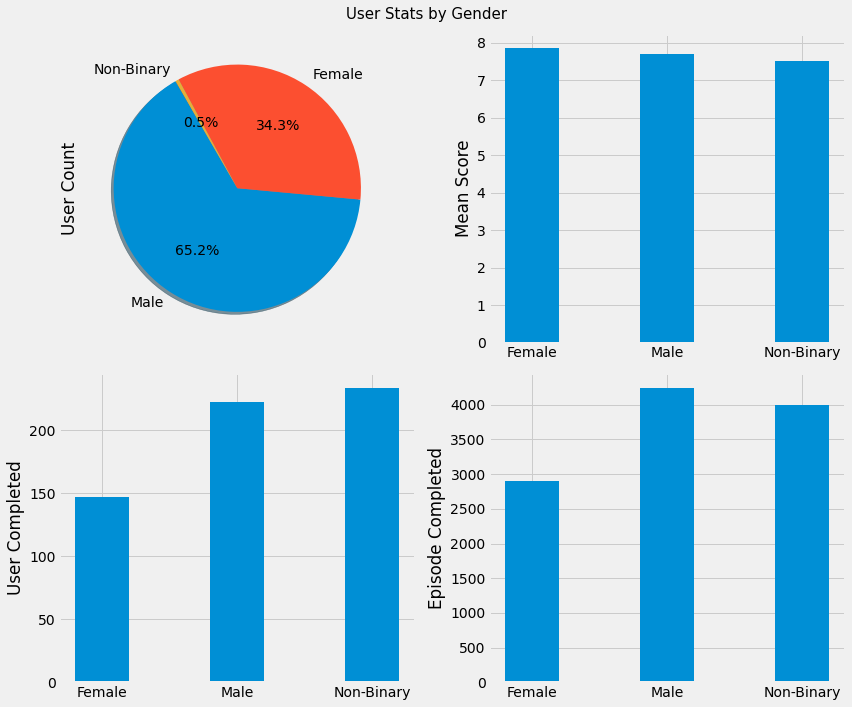

In [262]:
user_gender_count = list(user['gender'].value_counts())
user_gender_info = user.groupby('gender').mean()
gender = user_gender_info.index

plt.style.use('fivethirtyeight')

plt.rcParams["figure.figsize"] = [12, 10]
fig, ax = plt.subplots(2,2)
width = .4
label = ['Male', 'Female', 'Non-Binary']

ax[0,0].pie(user_gender_count, labels=label, shadow=True, autopct='%1.1f%%', startangle=120)
ax[1,0].bar(gender, user_gender_info.loc[:, 'user_completed'], width = width, align='center')
ax[0,1].bar(gender, user_gender_info.loc[:, 'stats_mean_score'], width = width)
ax[1,1].bar(gender, user_gender_info.loc[:, 'stats_episodes'], width = width)

ax[0,0].set_ylabel('User Count')
ax[1,0].set_ylabel('User Completed')
ax[0,1].set_ylabel('Mean Score')
ax[1,1].set_ylabel('Episode Completed')
                

font = {'weight' : 'light',
        'size'   : 12}
mpl.rc('font', **font) 
plt.grid(True)
fig.suptitle("User Stats by Gender", fontsize=15)
plt.tight_layout()
plt.show()

Age

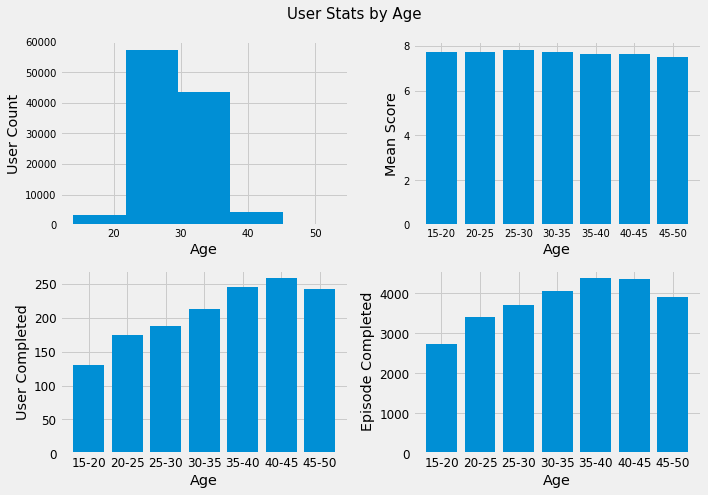

In [263]:
ranges = [15, 20, 25, 30, 35, 40, 45, 50]
ranges_label = ['15-20', '20-25', '25-30', '30-35', '35-40', '40-45', '45-50']
user_age_info = user.groupby(pd.cut(user.age, ranges)).mean()

plt.rcParams["figure.figsize"] = [10, 7]
fig, ax = plt.subplots(2, 2)

ax[0,0].hist(user['age'], bins=5)
ax[0,0].set_xlabel('Age')
ax[0,0].set_ylabel('User Count')

ax[1,0].bar(ranges_label, user_age_info['user_completed'])
ax[1,0].set_xlabel('Age')
ax[1,0].set_ylabel('User Completed')

ax[0,1].bar(ranges_label, user_age_info['stats_mean_score'])
ax[0,1].set_xlabel('Age')
ax[0,1].set_ylabel('Mean Score')

ax[1,1].bar(ranges_label, user_age_info['stats_episodes'])
ax[1,1].set_xlabel('Age')
ax[1,1].set_ylabel('Episode Completed')

axises = [ax[0,0], ax[0,1], ax[0,1], ax[0,1]]
for axis in axises:
        for tick in axis.get_xticklabels():
                tick.set_fontsize(10)
        for tick in axis.get_yticklabels():
                tick.set_fontsize(10)


font = {'weight' : 'light',
        'size'   : 12}
mpl.rc('font', **font)
fig.suptitle("User Stats by Age", fontsize=15)
plt.grid(True)
plt.tight_layout()
plt.show()

Source

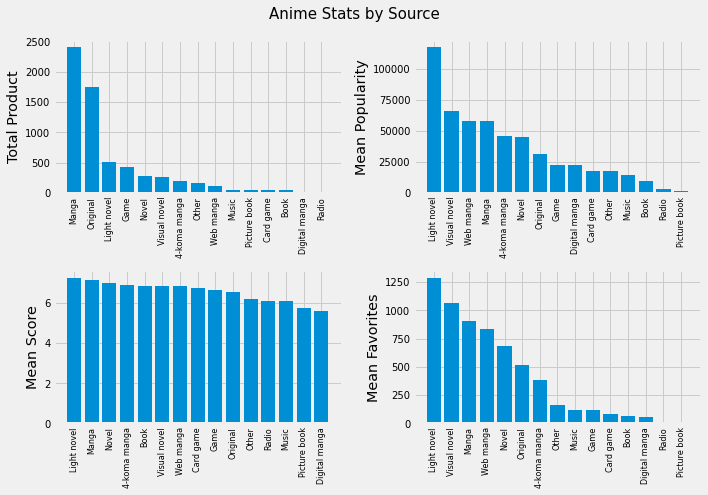

In [264]:
anime_source_count = anime['source'].value_counts()
anime_source_info = anime.groupby('source').mean()

plt.rcParams["figure.figsize"] = [10, 7]
fig, ax = plt.subplots(2, 2)
plt.style.use('fivethirtyeight')

ax[0,0].bar(anime_source_count.index, anime_source_count)
for tick in ax[0,0].get_xticklabels():
    tick.set_rotation(90)
    tick.set_fontsize(8)
for tick in ax[0,0].get_yticklabels():
    tick.set_fontsize(10)
ax[0,0].set_ylabel('Total Product')

ax[1,0].bar(anime_source_info.sort_values('score', ascending=False).index, anime_source_info.sort_values('score', ascending=False)['score'])
for tick in ax[1,0].get_xticklabels():
    tick.set_rotation(90)
    tick.set_fontsize(8)
for tick in ax[1,0].get_yticklabels():
    tick.set_fontsize(10)
ax[1,0].set_ylabel('Mean Score')

ax[0,1].bar(anime_source_info.sort_values('members', ascending=False).index, anime_source_info.sort_values('members', ascending=False)['members'])
for tick in ax[0,1].get_xticklabels():
    tick.set_rotation(90)
    tick.set_fontsize(8)
for tick in ax[0,1].get_yticklabels():
    tick.set_fontsize(10)
ax[0,1].set_ylabel('Mean Popularity')

ax[1,1].bar(anime_source_info.sort_values('favorites', ascending=False).index, anime_source_info.sort_values('favorites', ascending=False)['favorites'])
for tick in ax[1,1].get_xticklabels():
    tick.set_rotation(90)
    tick.set_fontsize(8)
for tick in ax[1,1].get_yticklabels():
    tick.set_fontsize(10)
ax[1,1].set_ylabel('Mean Favorites')

font = {'weight' : 'light',
        'size'   : 12}
mpl.rc('font', **font) 
fig.suptitle("Anime Stats by Source", fontsize=15)
plt.grid(True)
plt.tight_layout()
plt.show()

In [265]:
anime_source_info

,rank,score,popularity,members,favorites
source,,,,,
4-koma manga,4183.479381,6.884381,4070.520619,46109.891753,386.190722
Book,4473.000000,6.838864,6539.704545,9460.181818,62.204545
Card game,4790.217391,6.721087,5214.326087,17573.173913,78.869565
Digital manga,7236.571429,5.610000,3571.285714,22769.571429,58.000000
Game,4991.393868,6.619717,4671.688679,22943.931604,114.966981
Light novel,2843.422091,7.250651,1938.065089,117173.295858,1287.323471
Manga,3431.249583,7.142996,3722.307083,57931.537500,904.750000
Music,6445.690909,6.069636,7964.927273,14827.236364,120.600000
Novel,4246.893617,6.994504,5218.698582,45428.081560,683.531915


Type

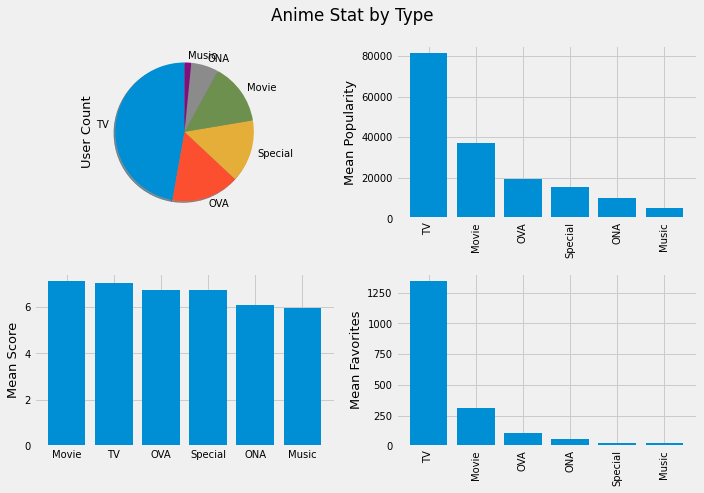

In [266]:
anime_type_count = anime['type'].value_counts()

anime_type_info = anime.groupby('type').mean()

# mpl.rcParams.update({'font.size': 2})

plt.rcParams["figure.figsize"] = [10, 7]
plt.rcParams['legend.title_fontsize'] = 'xx-small'

fig, ax = plt.subplots(2, 2)
plt.style.use('fivethirtyeight')

ax[0,0].pie(anime_type_count, labels=anime_type_count.index, shadow=True, startangle=90, textprops={'fontsize': 10})
ax[0,0].set_ylabel('User Count', fontsize=13)
# for tick in ax[0,0].get_legend_handles_labels()[0]:
#     tick.get_label().set_fontsize(8)

ax[1,0].bar(anime_type_info.sort_values('score', ascending=False).index, anime_type_info.sort_values('score', ascending=False)['score'])
for tick in ax[1,0].get_xticklabels():
    tick.set_fontsize(10)
for tick in ax[1,0].get_yticklabels():
    tick.set_fontsize(10)
ax[1,0].set_ylabel('Mean Score', fontsize=13)

ax[0,1].bar(anime_type_info.sort_values('members', ascending=False).index, anime_type_info.sort_values('members', ascending=False)['members'])
for tick in ax[0,1].get_xticklabels():
    tick.set_rotation(90)
    tick.set_fontsize(10)
for tick in ax[0,1].get_yticklabels():
    tick.set_fontsize(10)
ax[0,1].set_ylabel('Mean Popularity', fontsize=13)

ax[1,1].bar(anime_type_info.sort_values('favorites', ascending=False).index, anime_type_info.sort_values('favorites', ascending=False)['favorites'])
for tick in ax[1,1].get_xticklabels():
    tick.set_rotation(90)
    tick.set_fontsize(10)
for tick in ax[1,1].get_yticklabels():
    tick.set_fontsize(10)
ax[1,1].set_ylabel('Mean Favorites', fontsize=13)


plt.suptitle("Anime Stat by Type")
plt.tight_layout(), plt.grid(True)
plt.show()

In [267]:
anime.head(3)

,rank,score,popularity,members,favorites,source,type,genre,studio
title,,,,,,,,,
Fullmetal Alchemist: Brotherhood,1.0,9.25,4,1199091,106895,Manga,TV,"Action, Military, Adventure, Comedy, Drama, Ma...",Bones
Kimi no Na wa.,2.0,9.19,33,730076,34912,Original,Movie,"Supernatural, Drama, Romance, School",CoMix Wave Films
Gintama°,3.0,9.15,383,198744,5668,Manga,TV,"Action, Comedy, Historical, Parody, Samurai, S...",Bandai Namco Pictures


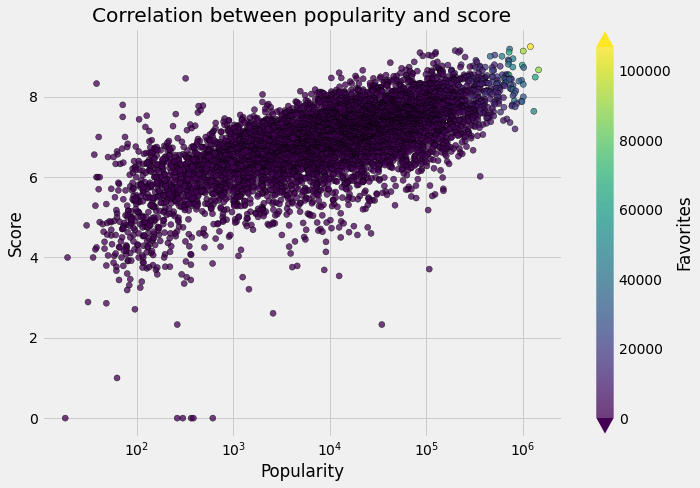

In [268]:
plt.style.use("fivethirtyeight")

plt.scatter(anime['members'], anime['score'], c=anime['favorites'], edgecolors='black', alpha=.75)
plt.xlabel('Popularity')
plt.ylabel('Score')
plt.xscale('log')
cbar = plt.colorbar(extend='both')
cbar.set_label('Favorites')

plt.title("Correlation between popularity and score")
plt.grid(True)
plt.tight_layout()
plt.show()

Genre

In [269]:
anime_genre = anime.genre

genre_list = []

genre_splited = []

for i in anime_genre.index:
    for j in str(anime_genre[i]).split(", "):
        genre_splited.append(j)
        if j not in genre_list:
            genre_list.append(j)

First I'm gonna show stats for multi-label genre

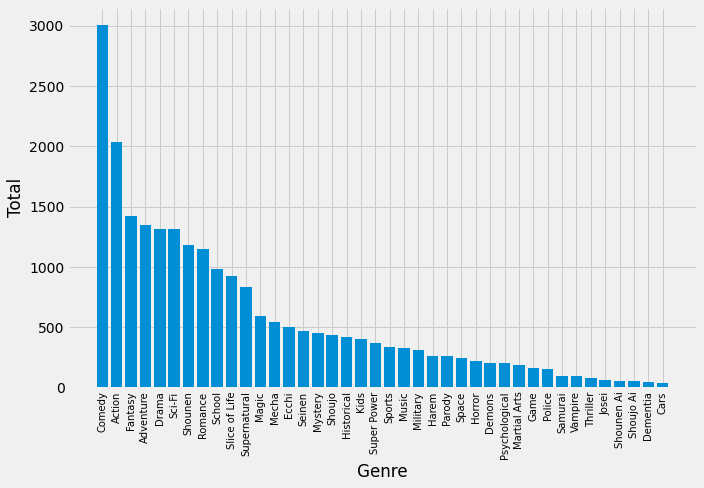

In [270]:
genre_splited_plot = pd.DataFrame(genre_splited).groupby(0).value_counts().sort_values(ascending=False).drop('nan')

plt.style.use('fivethirtyeight')
fig, ax = plt.subplots()

ax.bar(genre_splited_plot.index, genre_splited_plot)

ax.set_xlabel('Genre')
ax.set_ylabel('Total')
for tick in ax.get_xticklabels():
    tick.set_rotation(90)
    tick.set_fontsize(10)

plt.grid(True)
plt.tight_layout()
plt.show()

Because there's so many multi label genre with comedy, i'm gonna show the genre with comedy only stats 

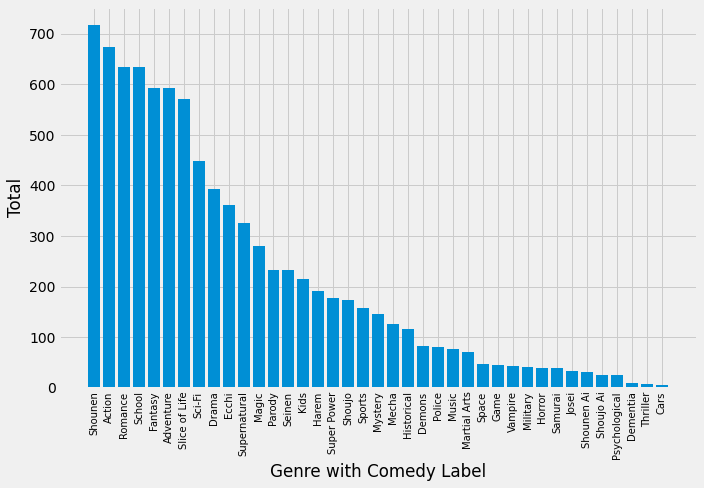

In [271]:
genre_with_comedy = []

for i in anime_genre.index:
    if 'Comedy' in str(anime_genre[i]).split(', '):
        for j in str(anime_genre[i]).split(', '):
            genre_with_comedy.append(j)
genre_with_comedy = [genre for genre in genre_with_comedy if genre!='Comedy']

genre_with_comedy_plot = pd.DataFrame(genre_with_comedy).groupby(0).value_counts().sort_values(ascending=False)

plt.style.use('fivethirtyeight')
fig, ax = plt.subplots()

ax.bar(genre_with_comedy_plot.index, genre_with_comedy_plot)

ax.set_xlabel('Genre with Comedy Label')
ax.set_ylabel('Total')
for tick in ax.get_xticklabels():
    tick.set_rotation(90)
    tick.set_fontsize(10)

plt.grid(True)
plt.tight_layout()
plt.show()

Next i'm gonna show the stats for first label genre

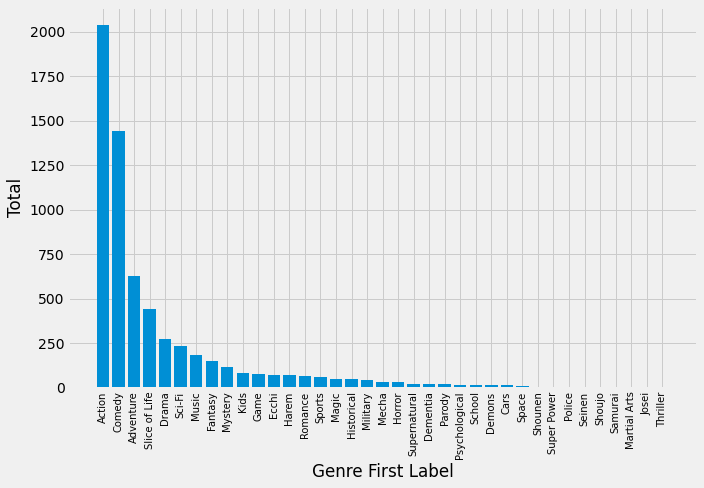

In [272]:
genre_first = []
for i in anime_genre.index:
    genre_first.append(str(anime_genre[i]).split(", ")[0])

genre_first_plot = pd.DataFrame(genre_first).groupby(0).value_counts().sort_values(ascending=False).drop('nan')

plt.style.use('fivethirtyeight')
fig, ax = plt.subplots()

ax.bar(genre_first_plot.index, genre_first_plot)

ax.set_xlabel('Genre First Label')
ax.set_ylabel('Total')
for tick in ax.get_xticklabels():
    tick.set_rotation(90)
    tick.set_fontsize(10)

plt.grid(True)
plt.tight_layout()
plt.show()

And finally i'm gonna show the stats for single-label genre

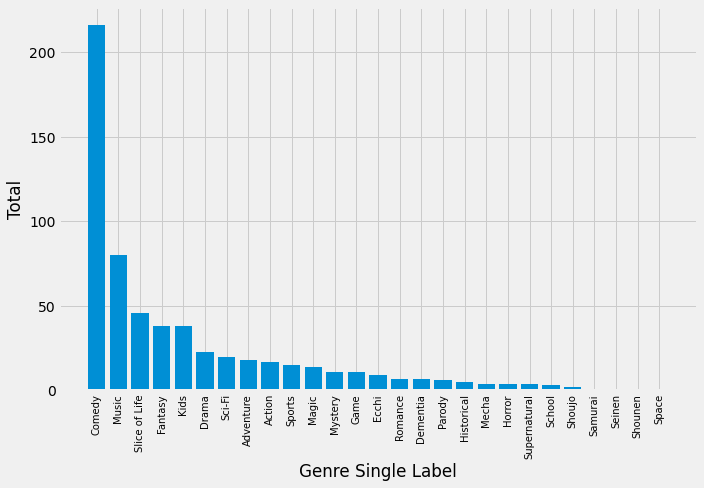

In [273]:
genre_single = []

for i in anime_genre.index:
    if len(str(anime_genre[i]).split(", ")) == 1:
        genre_single.append(str(anime_genre[i]))

genre_single_plot = pd.DataFrame(genre_single).groupby(0).value_counts().sort_values(ascending=False).drop('nan')

plt.style.use('fivethirtyeight')
fig, ax = plt.subplots()

ax.bar(genre_single_plot.index, genre_single_plot)

ax.set_xlabel('Genre Single Label')
ax.set_ylabel('Total')
for tick in ax.get_xticklabels():
    tick.set_rotation(90)
    tick.set_fontsize(10)

plt.grid(True)
plt.tight_layout()
plt.show()

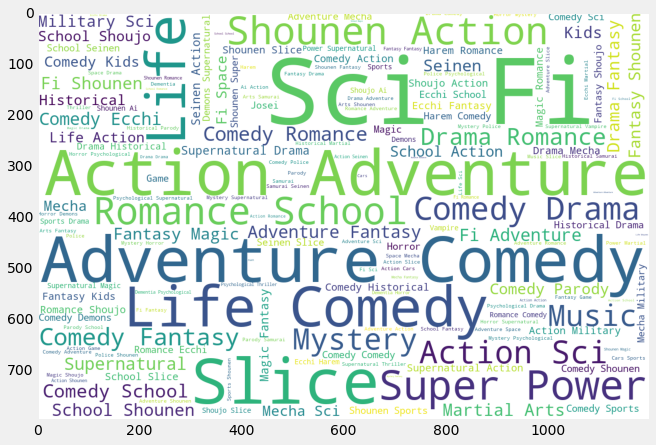

In [274]:
wc = WordCloud(background_color='white', height=800, width=1200).generate(" ".join(genre_splited))
plt.grid(False)
plt.imshow(wc)

In [275]:
anime.head(3)

,rank,score,popularity,members,favorites,source,type,genre,studio
title,,,,,,,,,
Fullmetal Alchemist: Brotherhood,1.0,9.25,4,1199091,106895,Manga,TV,"Action, Military, Adventure, Comedy, Drama, Ma...",Bones
Kimi no Na wa.,2.0,9.19,33,730076,34912,Original,Movie,"Supernatural, Drama, Romance, School",CoMix Wave Films
Gintama°,3.0,9.15,383,198744,5668,Manga,TV,"Action, Comedy, Historical, Parody, Samurai, S...",Bandai Namco Pictures


In [276]:
# # anime_genre_score = {}
# # for i in genre_list:
# #     if i == 'Action':
# #         anime_genre_score[i] = 1
# #     else : anime_genre_score[i] = 0

# anime_genre_score = pd.DataFrame(data=[0]*len(genre_list), index=genre_list)
# x=-1

# for i in anime.set_index('genre').index:
#     x += 1
#     for j in str(i).split(', '):
#             anime_genre_score.loc[j][0] = anime_genre_score.loc[j][0] + anime.set_index('genre').iloc[x][1]

In [277]:
# # str(anime.set_index('genre').index[0]).split(', ')[1]
# anime.set_index('genre').iloc[0][1]
# # anime.set_index('genre').loc[anime.set_index('genre').index[4]]['score']
# # # anime_genre_score[str(i).split(', ')[0]]
# # # anime_genre_score.loc[str(anime.set_index('genre').index[0]).split(', ')[0]][0]
# # # anime_genre_score.loc['Action'][0] = anime_genre_score.loc['Action'][0] + 1
# # # anime_genre_score
# # # [0]*10

In [278]:
# # anime_genre_score[str(anime.set_index('genre').index[0]).split(', ')[0]]
# # str(anime.set_index('genre').index[0]).split(', ')[0]
# # anime.set_index('genre').index[0]
# anime.set_index('genre').loc[:]['score']
# # anime_genre_score

Anime Watchers arround the world

In [358]:
user_location = pd.read_csv('datasets/users_cleaned.csv')
user_location = user_location.loc[:,['username','location']]

location = [x.split(",")[1].strip() if len(x.split(",")) > 1 else x.split(",")[0].strip() for x in user_location["location"].astype("str")]

In [361]:
location = ["USA" if x in ("USA", "United States of America", "U.S.A.", "US", "U.S.", "U.S.A", 
                           "usa", "United States", "California", "Texas", "New York", "Florida", 
                           "Ohio", "Michigan", "Illinois", "Washington", "Pennsylvania", "Virginia", 
                           "Arizona", "Maryland", "Tennessee",  "New Jersey", "North Carolina", 
                           "Colorado", "Oregon", "Indiana", "Massachusetts", "Minnesota", "NY", "CA", 
                           "TX", "FL", "PA", "IL", "MA", "NC", "NJ", "AZ", "GA", "VA", "IN","TN", 
                           "MI", "SC", "MN", "NYC", "MD", "MO", "WI", "Tx", "CT", "NV", "OR", "KY", 
                           "OH", "Ca", "CO", "LA", "DC", "AL", "ny", "NH", "Philadelphia", "north carolina", 
                           "Missouri", "Nevada", "Kentucky", "Louisiana", "Connecticut", "california", 
                           "Oklahoma", "Alabama", "Hawaii", "Kansas", "Utah", "Iowa", "South Carolina",  "Arkansas", "Nebraska", "texas", "Southern California", "New England", 
                           "Mississippi", "florida", "new york", "Idaho", "New Mexico", "Chicago", 
                           "New Hampshire", "Los Angeles", "Rhode Island", "New York City", "Maine", 
                           "America", "Alaska", "Delaware", "Northern Ireland", "ohio", "Seattle", 
                           "West Virginia", "North Dakota", "South Dakota", "Boston", "Vermont", "Montana", 
                           "michigan", "washington", "New york", "Las Vegas", "Wisconsin", 
                           "Washington State", "SoCal")  else x for x in location]
location = ["UK" if x in ("England", "england", "United Kingdom", "Scotland", "Glasgow", "London", "london", 
                          "Wales", "Manchester", "Nottingham", "Kent", "England.", "united kingdom", "Essex", 
                          "UK", "Uk", "uk", "Britain", "Liverpool", "Birmingham") else x for x in location]
location = ["Netherlands" if x in ("Netherlands", "The Netherlands", "Nederland", "Netherland", "the Netherlands", 
                                   "The netherlands", "netherlands", "Holland", "Amsterdam", "Utrecht", "Rotterdam", 
                                   "Limburg", "the netherlands", "Zuid-Holland") else x for x in location]
location = ["Canada" if x in ("Canada", "canada", "CANADA", "Ontario", "ON", "Quebec", "Québec", "Alberta", 
                              "Toronto", "Vancouver", "British Columbia", "Saskatchewan", "ontario", "BC", 
                              "Montreal", "Manitoba", "Nova Scotia") else x for x in location]
location = ["Brazil" if x in ("Brazil", "Brasil", "São Paulo", "Sao Paulo", "São Paulo - Brazil", "Paraná", 
                              "Pará", "Rio de Janeiro", "RJ", "RS", "SP", "MG", "DF", "Porto Alegre", 
                              "Minas Gerais", "brasil", "Brasil.", "Rio Grande do Sul", "Santa Catarina", 
                              "Bahia", "Ceará", "Pernambuco", "Brazil.", "brazil", 
                              "Goiás") else x for x in location]
location = ["Russia" if x in ("Russia", "Moscow", "Russian Federation", "Saint-Petersburg", "St. Petersburg", 
                              "Saint Petersburg", "Novosibirsk", "Россия", 
                              "St.Petersburg") else x for x in location]
location = ["Japan" if x in ("Japan", "japan", "Tokyo", "tokyo", "Ikebukuro", "Kyoto", 
                             "Osaka") else x for x in location]
location = ["Turkey" if x in ("Turkey", "Istanbul", "İstanbul", "istanbul", "Ankara", "Bursa", "Türkiye", 
                              "Turkiye", "turkey", 
                              "İzmir", "Izmir", "Antalya", "TURKEY") else x for x in location]
location = ["Philippines" if x in ("Philippines", "philippines", "Manila", "Cavite", "Phillipines", 
                                   "Metro Manila", "manila", "Cebu", "Laguna", 
                                   "Quezon City") else x for x in location]
location = ["Indonesia" if x in ("Indonesia", "Jakarta", "indonesia", "Bandung", "West Java", "Central Java", 
                                 "jakarta", "Jawa Timur", "Banten", "Jawa Barat", "East Java", "Indonesian", 
                                 "Yogyakarta") else x for x in location]
location = ["Spain" if x in ("Spain", "España", "Barcelona", "Madrid", "Valencia", 
                             "Catalonia") else x for x in location]
location = ["Poland" if x in ("Poland", "poland", "Warsaw", "Warszawa", "Poznań", "Łódź", "Gdańsk", "Wrocław", 
                              "Kraków", "Cracow", "Szczecin", "Gdynia", "Bydgoszcz", "Lublin", "Białystok", 
                              "Katowice", "Rzeszów", "Lodz") else x for x in location]
location = ["France" if x in ("France", "Paris", "france", "paris", "FRANCE") else x for x in location]
location = ["Australia" if x in ("Australia", "australia", "Sydney", "Melbourne", "Victoria", "WA", "NSW",
                                 "Western Australia", "New South Wales", "Adelaide", "Queensland", "Perth",
                                 "South Australia", "Brisbane") else x for x in location]
location = ["Portugal" if x in ("Portugal", "Lisbon", "Porto", "Lisboa", "portugal") else x for x in location]
location = ["Italy" if x in ("Italy", "Italia", "italy", "Rome", "Roma", "italia") else x for x in location]
location = ["Mexico" if x in ("Mexico", "México", "Mexico City", "mexico", "Baja California", 
                              "Jalisco") else x for x in location]
location = ["Argentina" if x in ("Argentina", "Buenos Aires") else x for x in location]
location = ["Greece" if x in ("Greece", "Athens", "greece", "athens") else x for x in location]
location = ["Hungary" if x in ("Hungary", "Budapest") else x for x in location]
location = ["India" if x in ("India", "india", "INDIA", "Mumbai") else x for x in location]
location = ["Sweden" if x in ("Sweden", "sweden", "Stockholm", "Gothenburg") else x for x in location]
location = ["Latvia" if x in ("Latvia", "Riga") else x for x in location]
location = ["Germany" if x in ("Germany", "Berlin", "Deutschland", "NRW", "Hamburg", "germany", 
                               "Bavaria", "Hessen") else x for x in location]
location = ["Malaysia" if x in ("Malaysia", "malaysia", "Kuala Lumpur", "Selangor", 
                                "Sarawak") else x for x in location]
location = ["Bulgaria" if x in ("Bulgaria", "Sofia") else x for x in location]
location = ["Singapore" if x in ("Singapore", "singapore") else x for x in location]
location = ["Romania" if x in ("Romania", "Bucharest") else x for x in location]
location = ["Austria" if x in ("Austria", "Vienna") else x for x in location]
location = ["Israel" if x in ("Israel", "israel") else x for x in location]
location = ["Lithuania" if x in ("Lithuania", "Vilnius", "Kaunas") else x for x in location]
location = ["Czech Republic" if x in ("Czech Republic", "Czech republic", "Prague") else x for x in location]
location = ["Estonia" if x in ("Estonia", "Tallinn") else x for x in location]
location = ["Ukraine" if x in ("Ukraine", "Kiev", "Odessa") else x for x in location]
location = ["Norway" if x in ("Norway", "Oslo", "norway") else x for x in location]
location = ["Colombia" if x in ("Colombia", "Cali") else x for x in location]
location = ["New Zealand" if x in ("New Zealand", "Auckland", "NZ") else x for x in location]
location = ["Finland" if x in ("New Zealand", "Helsinki") else x for x in location]
location = ["Belgium" if x in ("Belgium", "belgium", "Antwerp") else x for x in location]
location = ["China" if x in ("China", "Hong Kong") else x for x in location]
location = ["Vietnam" if x in ("Vietnam", "Viet Nam") else x for x in location]
location = ["Peru" if x in ("Peru", "Perú", "Lima") else x for x in location]
location = ["Saudi Arabia" if x in ("Saudi Arabia", "Riyadh", "KSA", "K.S.A", "Jeddah", "saudi arabia", 
                                    "jeddah") else x for x in location]
location = ["Kuwait" if x in ("Kuwait", "kuwait") else x for x in location]
location = ["Thailand" if x in ("Thailand", "Bangkok") else x for x in location]
location = ["Bangladesh" if x in ("Bangladesh", "Dhaka", "bangladesh") else x for x in location]
location = ["United Arab Emirates" if x in ("UAE", "Dubai") else x for x in location]
location = ["Ireland" if x in ("Ireland", "Dublin") else x for x in location]
location = ["Chile" if x in ("Chile", "Santiago") else x for x in location]
location = ["Serbia" if x in ("Serbia", "Belgrade") else x for x in location]
location = ["Egypt" if x in ("Egypt", "Cairo") else x for x in location]
location = ["Belarus" if x in ("Belarus", "Minsk") else x for x in location]
location = ["Denmark" if x in ("Denmark", "Copenhagen") else x for x in location]
location = ["South Korea" if x in ("South Korea", "Korea", "Seoul") else x for x in location]
location = ["Croatia" if x in ("Croatia", "Zagreb") else x for x in location]
location = ["Georgia" if x in ("Georgia", "Tbilisi", "georgia") else x for x in location]
#Georgia can be state of America "Georgia" or country "Georgia". I putted it in country category. 
#And i putted GA in state category.

In [367]:
loc = pd.Series(location).value_counts()[:25] 
df_loc = pd.DataFrame({'Country':loc.index, 'Members':loc.values})

fig = px.bar(df_loc, x='Country', y='Members', title="Anime Watchers Around The World (MyAnimeList Members)")
fig.show()

In [360]:
# user_location
# location
pd.Series(location).value_counts()[:5] 

Poland        3538
California    2739
Canada        2045
Germany       2040
Brazil        1997
dtype: int64

In [304]:
anime_mappa = pd.read_csv('datasets/anime_cleaned.csv').sort_values(by='rank').loc[:,['title', 'rank', 'score', 'popularity', 'members', 'favorites', 'source', 'type', 'genre', 'studio', 'aired_from_year']].set_index('title')
anime_mappa = anime_mappa[anime_mappa['studio'] == 'MAPPA']

In [370]:
loc_exc_usa = pd.Series(location).value_counts()[0:250] 
df_loc_exc_usa = pd.DataFrame({'Country':loc_exc_usa.index, 'Members':loc_exc_usa.values})
df_loc_exc_usa = df_loc_exc_usa[df_loc_exc_usa.Country != "Antarctica"].reset_index(drop=True)

data = [ dict(
        type = 'choropleth',
        locations = df_loc_exc_usa['Country'],
        locationmode = 'country names',
        z = df_loc_exc_usa['Members'],
        text = df_loc_exc_usa['Country'],
        colorscale=
            [[0.0, "rgb(251, 237, 235)"],
            [0.09, "rgb(245, 211, 206)"],
            [0.12, "rgb(239, 179, 171)"],
            [0.15, "rgb(236, 148, 136)"],
            [0.22, "rgb(239, 117, 100)"],
            [0.29, "rgb(235, 90, 70)"],
            [0.36, "rgb(207, 81, 61)"], [0.41, "rgb(176, 70, 50)"],
            [0.77, "rgb(147, 59, 39)"],
            [1.00, "rgb(110, 47, 26)"]],
        autocolorscale = False,
        reversescale = False,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            tickprefix = '',
            title = 'Members'),
      ) ]

layout = dict(
    title = 'Anime Watchers Around The World (On The Basis Of MyAnimeList)',
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(
            type = 'Mercator'
        )
    )
)

w_map = dict( data=data, layout=layout )
iplot( w_map, validate=False)

Insight for MAPPA

In [1]:
anime_mappa.sort_values('aired_from_year')
len(anime_mappa)

anime_mappa['aired_from_year'].value_counts().sort_index()

plt.rcParams["figure.figsize"] = [7, 5]
plt.style.use('fivethirtyeight')

plt.plot(anime_mappa['aired_from_year'].value_counts().sort_index().head(6), marker="o", linewidth=1.8)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.tick_params(axis='both', which='minor', labelsize=8)

plt.title("Total Mappa Products in The Last 6 Years", fontsize=12
# plt.tight_layout()
plt.show()

NameError: name 'anime_mappa' is not defined